# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [70]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [71]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [74]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [75]:
fraud.shape

(1000000, 8)

In [76]:
df = fraud

In [77]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [84]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [93]:
features = df.drop(columns = ["fraud"])
target = df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
log_reg = LogisticRegression()

In [99]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [100]:
log_reg.score(X_test_scaled, y_test)

0.958696

In [103]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228172
         1.0       0.89      0.60      0.72     21828

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [105]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [107]:
train["fraud"] = y_train.values
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.353877,0.164415,-0.401048,0.366921,1.360935,-0.333674,0.732273,0.0
1,0.727443,-0.177146,-0.590150,0.366921,1.360935,-0.333674,-1.365610,0.0
2,1.068062,3.908754,-0.332517,0.366921,-0.734789,-0.333674,0.732273,1.0
3,-0.206834,0.425636,-0.012529,0.366921,1.360935,-0.333674,0.732273,0.0
4,-0.353954,-0.123103,-0.364760,0.366921,1.360935,-0.333674,0.732273,0.0
...,...,...,...,...,...,...,...,...
749995,-0.083997,-0.176987,-0.424159,0.366921,1.360935,-0.333674,0.732273,0.0
749996,0.161529,-0.148022,-0.558265,0.366921,-0.734789,-0.333674,0.732273,0.0
749997,0.327843,-0.109710,-0.577785,0.366921,-0.734789,-0.333674,0.732273,0.0
749998,0.383020,-0.048579,0.129717,0.366921,1.360935,-0.333674,0.732273,0.0


In [109]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [111]:
yes_df_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)
yes_df_oversampled.shape

(684425, 8)

In [113]:
train_over = pd.concat([yes_df_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
497622,-0.315347,-0.172194,2.601315,0.366921,-0.734789,-0.333674,0.732273,1.0
486753,1.209843,-0.172887,-0.343784,0.366921,-0.734789,-0.333674,0.732273,1.0
524913,-0.394690,-0.128598,1.427649,-2.725385,-0.734789,-0.333674,-1.365610,1.0
241288,0.052484,0.013458,3.635160,0.366921,-0.734789,-0.333674,0.732273,1.0
479303,1.855232,-0.183783,3.304345,0.366921,1.360935,-0.333674,0.732273,1.0
...,...,...,...,...,...,...,...,...
749995,-0.083997,-0.176987,-0.424159,0.366921,1.360935,-0.333674,0.732273,0.0
749996,0.161529,-0.148022,-0.558265,0.366921,-0.734789,-0.333674,0.732273,0.0
749997,0.327843,-0.109710,-0.577785,0.366921,-0.734789,-0.333674,0.732273,0.0
749998,0.383020,-0.048579,0.129717,0.366921,1.360935,-0.333674,0.732273,0.0


NameError: name 'plt' is not defined

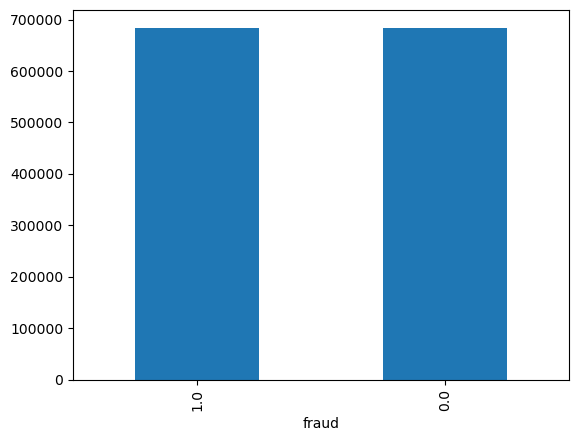

In [115]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()
print(fraud_plt)

In [117]:
#Now, with balanced data, we will create a new instance of Logistic Regression.

X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [119]:
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [121]:
pred_over = log_reg_over.predict(X_test_scaled)
print(classification_report(y_pred = pred_over, y_true = y_test))

C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228172
         1.0       0.57      0.95      0.71     21828

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [123]:
log_reg_over.score(X_test_scaled, y_test)

C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.933524

In [125]:
from sklearn.metrics import confusion_matrix
log_reg_confusion_matrix = confusion_matrix(y_test,pred_over)  #Always Actual,Predicted
log_reg_confusion_matrix

array([[212673,  15499],
       [  1120,  20708]], dtype=int64)

In [127]:
no_df_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_df_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
398649,0.153170,-0.089981,0.618510,0.366921,-0.734789,-0.333674,0.732273,0.0
253748,-0.108744,-0.179612,0.206507,0.366921,1.360935,-0.333674,0.732273,0.0
527676,-0.306233,-0.125602,-0.488664,0.366921,-0.734789,-0.333674,0.732273,0.0
286851,-0.060726,-0.170829,-0.407952,0.366921,1.360935,-0.333674,0.732273,0.0
688878,-0.189033,-0.140059,-0.423198,0.366921,-0.734789,-0.333674,0.732273,0.0
...,...,...,...,...,...,...,...,...
513293,-0.265519,-0.160436,2.978479,0.366921,-0.734789,2.996937,-1.365610,0.0
265170,-0.295817,2.609703,-0.128734,0.366921,1.360935,-0.333674,0.732273,0.0
538068,0.276237,-0.185773,-0.458251,0.366921,-0.734789,-0.333674,-1.365610,0.0
410470,-0.264819,-0.151203,-0.570653,0.366921,1.360935,-0.333674,-1.365610,0.0


In [129]:
train_under = pd.concat([no_df_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
398649,0.153170,-0.089981,0.618510,0.366921,-0.734789,-0.333674,0.732273,0.0
253748,-0.108744,-0.179612,0.206507,0.366921,1.360935,-0.333674,0.732273,0.0
527676,-0.306233,-0.125602,-0.488664,0.366921,-0.734789,-0.333674,0.732273,0.0
286851,-0.060726,-0.170829,-0.407952,0.366921,1.360935,-0.333674,0.732273,0.0
688878,-0.189033,-0.140059,-0.423198,0.366921,-0.734789,-0.333674,0.732273,0.0
...,...,...,...,...,...,...,...,...
749951,-0.319900,-0.183620,0.941113,0.366921,1.360935,-0.333674,0.732273,1.0
749953,1.164096,-0.183467,-0.304785,0.366921,-0.734789,-0.333674,0.732273,1.0
749966,3.607521,-0.184784,-0.056542,0.366921,-0.734789,-0.333674,0.732273,1.0
749988,1.487922,-0.105676,0.563789,0.366921,-0.734789,-0.333674,0.732273,1.0


NameError: name 'plt' is not defined

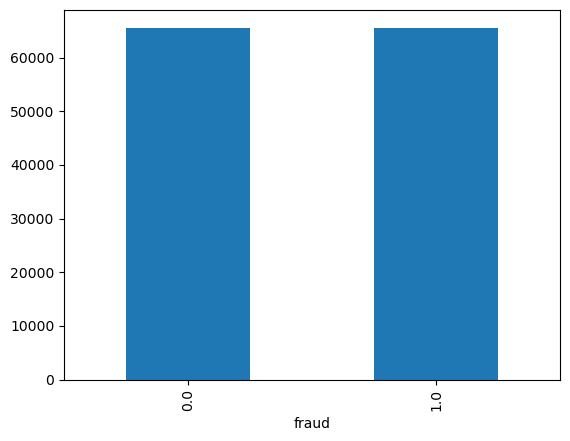

In [131]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()
print(fraud_plt)

In [133]:
#Separating our features from our target

X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [135]:
# Model training

log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)


LogisticRegression()

In [137]:
# Evaluate our model

pred_under = log_reg_under.predict(X_test_scaled)
print(classification_report(y_pred = pred_under, y_true = y_test))


C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228172
         1.0       0.57      0.95      0.71     21828

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [139]:
log_reg_under.score(X_test_scaled, y_test)

C:\Users\npdan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.933788

In [141]:
log_reg_confusion_matrix = confusion_matrix(y_test, pred_under)  #Always Actual,Predicted
log_reg_confusion_matrix

array([[212769,  15403],
       [  1150,  20678]], dtype=int64)

In [143]:
#SMOTE utilizes KNN approach to generate synthetic samples for the minority class.
#SMOTE comes from a different package - imblearn

from imblearn.over_sampling import SMOTE

In [145]:
#sampling_strategy - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [149]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [150]:
#Now lets train our model, to see if get any improvements

log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_sm, y_train_sm)


LogisticRegression(max_iter=1000)

In [153]:
#Evaluate our model

pred_smote = log_reg_smote.predict(X_test_scaled)
print(classification_report(y_pred = pred_smote, y_true = y_test))


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228172
         1.0       0.57      0.95      0.71     21828

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [155]:
log_reg_smote.score(X_test_scaled, y_test)

0.933532

In [157]:
log_reg_confusion_matrix = confusion_matrix(y_test,pred_smote)  #Always Actual,Predicted
log_reg_confusion_matrix

array([[212672,  15500],
       [  1117,  20711]], dtype=int64)

In [159]:
compare = pd.DataFrame({'y_test': y_test, 'Over':pred_over, 'Under':pred_under, 'Smote':pred_smote})
compare

,y_test,Over,Under,Smote
692763,0.0,0.0,0.0,0.0
914695,0.0,0.0,0.0,0.0
345848,0.0,0.0,0.0,0.0
15211,0.0,0.0,0.0,0.0
244602,0.0,1.0,1.0,1.0
...,...,...,...,...
942922,0.0,0.0,0.0,0.0
962001,0.0,0.0,0.0,0.0
330296,0.0,0.0,0.0,0.0
812623,0.0,0.0,0.0,0.0
